# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Step 1: Reading and Understanding the Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the datasets
cd = pd.read_csv("churn_data.csv")
cd2 = pd.read_csv("customer_data.csv")
id = pd.read_csv("internet_data.csv")


In [3]:
# Checking the head of the datasets
cd.head(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Checking the head of the datasets
cd2.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [5]:
# Checking the head of the datasets
id.head(10)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,No,DSL,Yes,Yes,No,No,No,No


In [6]:
# Merging all datasets in one common dataset on 'customerID'
cd3 = pd.merge(cd, cd2, how='inner', on='customerID')

In [7]:
# Merging all datasets in one common dataset on 'customerID'
cd4 = pd.merge(cd3, id, how='inner', on='customerID')

# Step 2:understanding the structure of the merged dataset

In [8]:
#checking the head of the dataset
cd4.head(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Female,...,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,Male,...,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No,Female,...,No,No,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Female,...,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No,Male,...,No,Yes,No,DSL,Yes,Yes,No,No,No,No


In [9]:
# checking the shape of the dataframe
cd4.shape

(7043, 21)

In [10]:
# Checking at the statistical info of the dataframe
cd4.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
# Checkinge the type of each column
cd4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


# Step 3: Data Preparation

In [12]:
# Extracting the 'object' data types only 
cd5=cd4.select_dtypes(include='object')
cd5.columns

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn', 'gender', 'Partner',
       'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

In [13]:
# Checking the unique value counts for object data types
cd5.nunique()

customerID          7043
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
gender                 2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

In [14]:
# Checking the columns which have only 2 unique values
cd6 = cd4[["PhoneService","PaperlessBilling","Churn","gender","Partner","Dependents"]]

cd6.head()

,PhoneService,PaperlessBilling,Churn,gender,Partner,Dependents
0,No,Yes,No,Female,Yes,No
1,Yes,No,No,Male,No,No
2,Yes,Yes,Yes,Male,No,No
3,No,No,No,Male,No,No
4,Yes,Yes,Yes,Female,No,No


In [15]:
# Convert 2 unique (YES/NO) object columns to 1/0 values.
# Converting Yes to 1 and No to 0
cd4['PhoneService'] = cd4['PhoneService'].map({'Yes': 1, 'No': 0})
cd4['PaperlessBilling'] = cd4['PaperlessBilling'].map({'Yes': 1, 'No': 0})
cd4['Churn'] = cd4['Churn'].map({'Yes': 1, 'No': 0})
cd4['Partner'] = cd4['Partner'].map({'Yes': 1, 'No': 0})
cd4['Dependents'] = cd4['Dependents'].map({'Yes': 1, 'No': 0})

In [16]:

cd7 = cd5[["Contract","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]]
cd7.head()

,Contract,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Month-to-month,No phone service,DSL,No,Yes,No,No,No,No
1,One year,No,DSL,Yes,No,Yes,No,No,No
2,Month-to-month,No,DSL,Yes,Yes,No,No,No,No
3,One year,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,Month-to-month,No,Fiber optic,No,No,No,No,No,No


In [17]:
# Checking the columns which have only 3 unique values
for column in cd7:
    print(cd5[column].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, d

In [18]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(cd4['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(cd4['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(cd4['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(cd4['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(cd4['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(cd4['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(cd4['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(cd4['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(cd4['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(cd4['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(cd4['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
cd4 = pd.concat([cd4,sm1],axis=1)

In [19]:
# Checking the head of the processed dataset
cd4.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [20]:
# Droping the original columns on which dummies are created 
cd4 = cd4.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [21]:
# Checking the info of dataset
cd4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [22]:
# Dropping CustomerID as it is useless for model prediction
cd4 = cd4.drop(['customerID'], axis=1)
cd4.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.5,0,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [23]:
# converting the datatype of 'MonthlyCharges','TotalCharges' from object to float
cd4.MonthlyCharges = cd4.MonthlyCharges.astype(float, errors="ignore")
cd4['TotalCharges'] = pd.to_numeric(cd4['TotalCharges'], errors = 'coerce')

In [24]:
# Checking the head of MonthlyCharges
cd4.MonthlyCharges.head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

In [25]:
# Checking the percentage of missing values
round(100*(cd4.isnull().sum()/len(cd4.index)), 2)

tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No                   

From the above calculation, it can be written that there is no null value present in the dataset

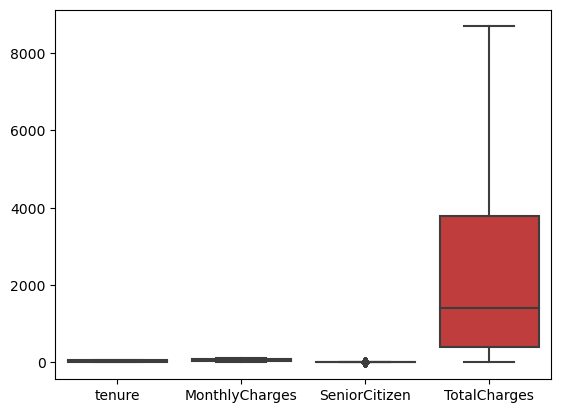

In [26]:
# Checking for outliers in the continuous variables
cd8 = cd4[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
sns.boxplot(data = cd8)
plt.show()

From the boxplot, it can be seen that there is no outliers in the dataset

In [27]:
# There is sum NAN values in TotalCharge columns, so it should be dropped
cd4[['TotalCharges']].value_counts()
# Removing NaN TotalCharges rows
cd4 = cd4[~np.isnan(cd4['TotalCharges'])]

# Step4: Model Building Preprocessing

In [28]:
# Importing test_train_split
from sklearn.model_selection import train_test_split

In [29]:
# Putting feature variables to X
X = cd4.drop(['Churn'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [30]:
# Putting response variable to y
y = cd4['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [31]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 30 Sep 2023   Deviance:                       4009.4
Time:                        23:30:13   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1321      0.283      0.467      0.641      -0.422       0.687
tenure                                   -0.0619      0.008     -8.015      0.000      -0.077      -0.047
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -0.0725      0.039     -1.880      0.060      -0.148       0.003
TotalCharges                              0.0003   8.73e-05      3.705      0.000       0.000       0.000
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.8770      0.278     -3.158      0.002      -1.421      -0.333
OnlineSecurity_No                         0.5168      0.161      3.207      0.001       0.201       0.833
OnlineSecurity_Yes                        0.4923      0.348      1.416      0.157      -0.189       1.174
OnlineBackup_No                           0.4175      0.160      2.614      0.009       0.104       0.731
OnlineBackup_Yes                          0.5916      0.347      1.705      0.088      -0.089       1.272
DeviceProtection_No                       0.3431      0.159      2.159      0.031       0.032       0.655
DeviceProtection_Yes                      0.6660      0.348      1.911      0.056      -0.017       1.349
TechSupport_No                            0.5198      0.161      3.226      0.001       0.204       0.836
TechSuppo

<AxesSubplot:>

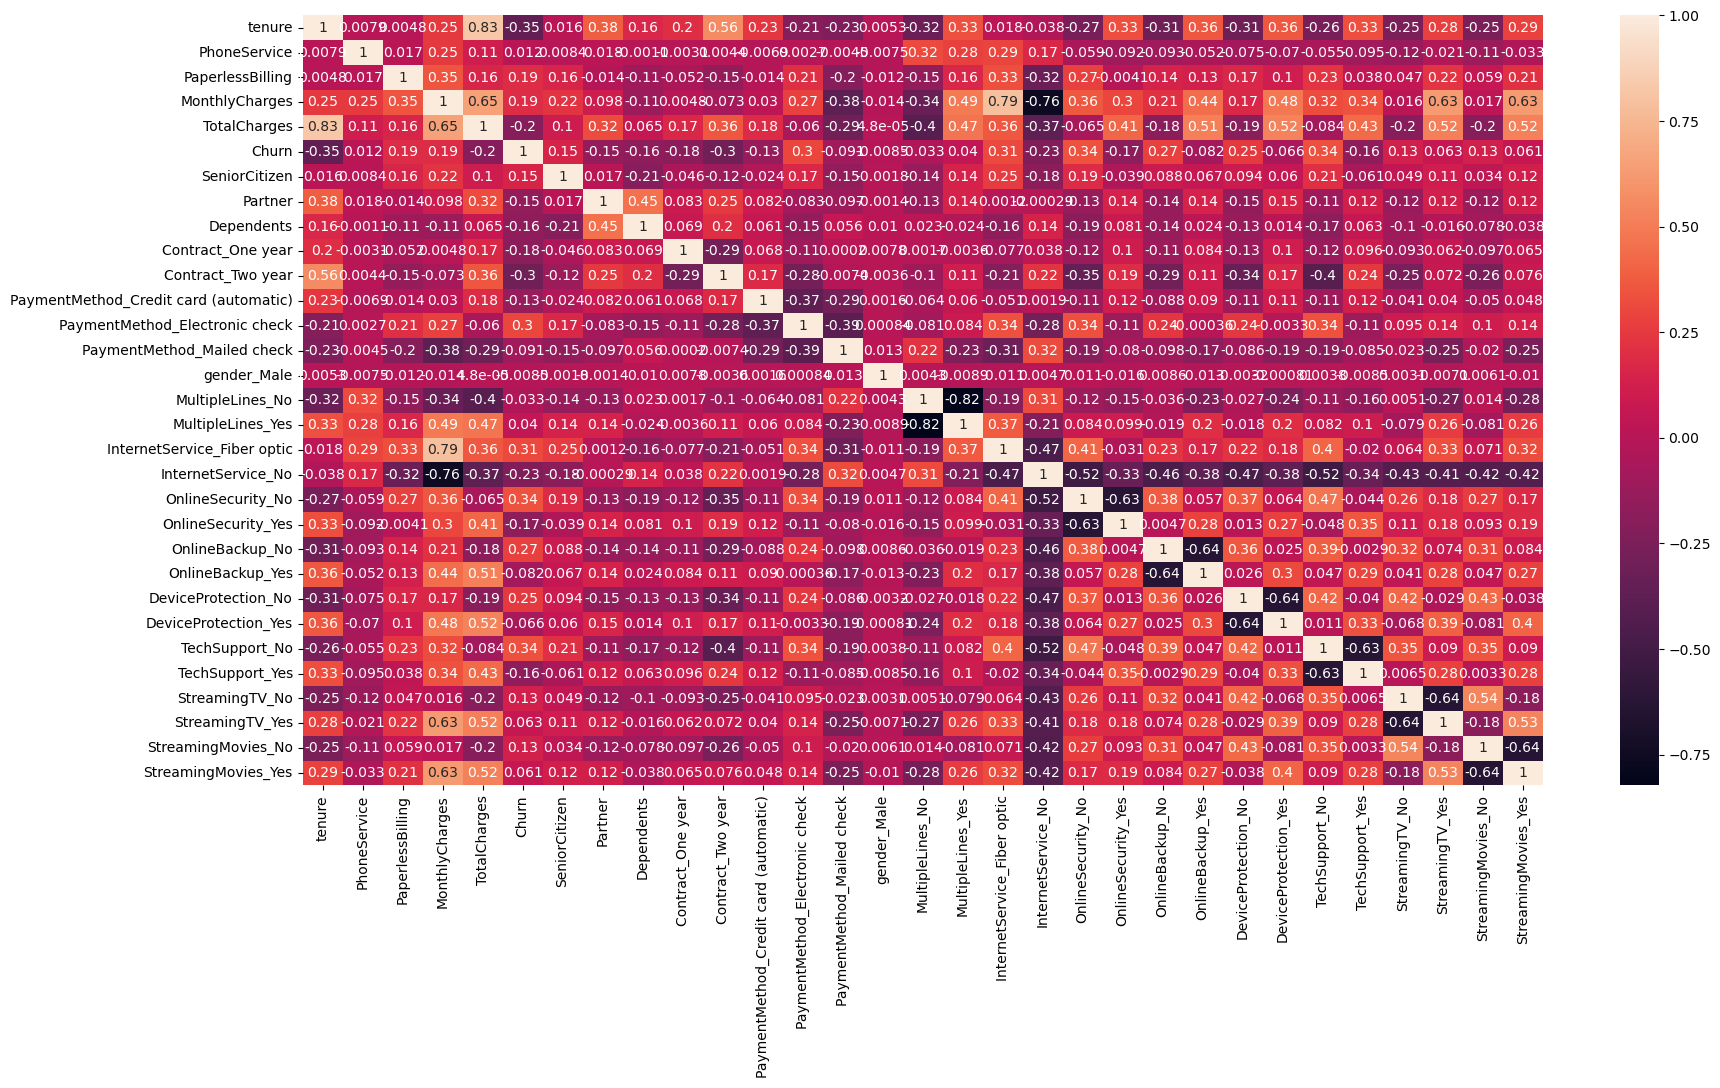

In [33]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(cd4.corr(),annot = True)

In [34]:
## Dropping highly correlated variables.

X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

<AxesSubplot:>

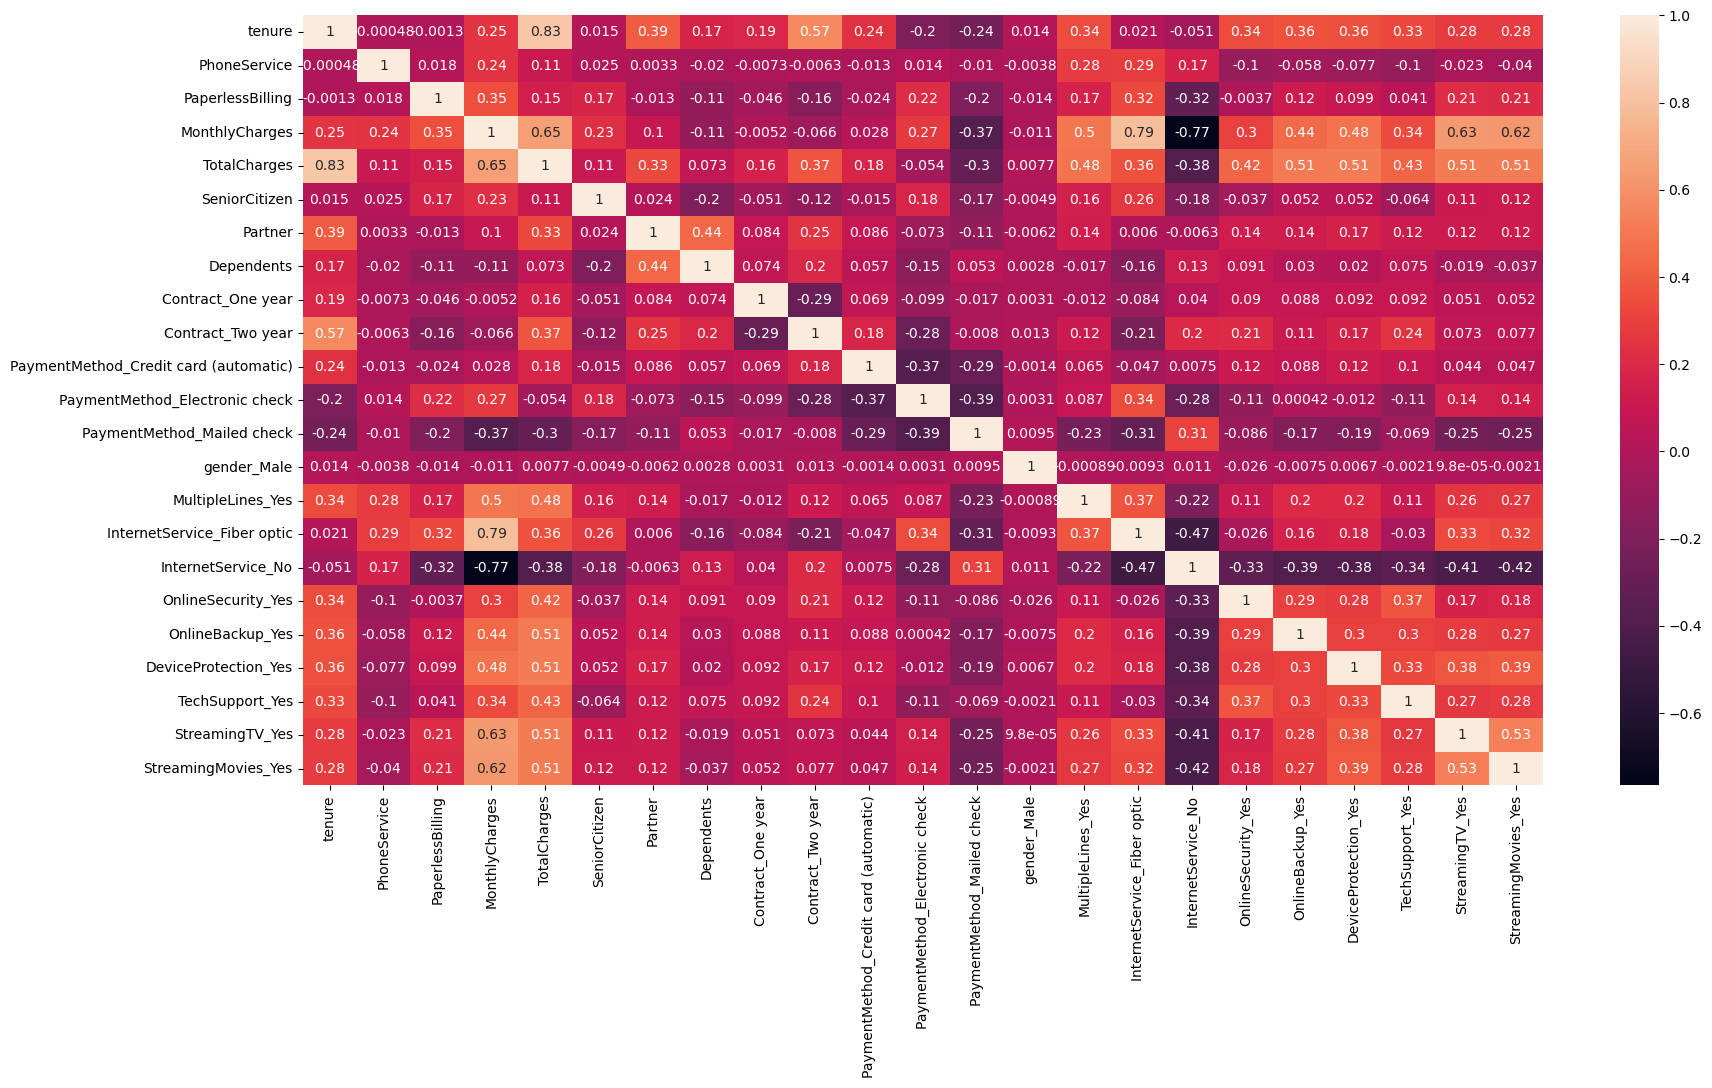

In [35]:

plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)


# Step5: Model Building Using Logistic Regression

In [36]:
# # Logistic regression model 2 
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 30 Sep 2023   Deviance:                       4009.4
Time:                        23:30:26   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.0343      0.993      2.049      0.040       0.089       3.980
tenure                                   -0.0619      0.008     -8.015      0.000      -0.077      -0.047
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -0.0725      0.039     -1.880      0.060      -0.148       0.003
TotalCharges                              0.0003   8.73e-05      3.705      0.000       0.000       0.000
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking


[False  True  True False False False False  True  True  True  True  True
 False False False False  True False  True  True  True False False False
  True False False  True False False]
[10  1  1 15 18  4 17  1  1  1  1  1 14 16  6  5  1  7  1  1  1 11 13 12
  1  2  8  1  9  3]


In [38]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']



In [39]:
# Running the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)

logsk.fit(X_train, y_train)


LogisticRegression(C=1000000000.0)

In [40]:

#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 30 Sep 2023   Deviance:                       4009.4
Time:                        23:30:29   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1321      0.283      0.467      0.641      -0.422       0.687
tenure                                   -0.0619      0.008     -8.015      0.000      -0.077      -0.047
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -0.0725      0.039     -1.880      0.060      -0.148       0.003
TotalCharges                              0.0003   8.73e-05      3.705      0.000       0.000       0.000
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.8770      0.278     -3.158      0.002      -1.421      -0.333
OnlineSecurity_No                         0.5168      0.161      3.207      0.001       0.201       0.833
OnlineSecurity_Yes                        0.4923      0.348      1.416      0.157      -0.189       1.174
OnlineBackup_No                           0.4175      0.160      2.614      0.009       0.104       0.731
OnlineBackup_Yes                          0.5916      0.347      1.705      0.088      -0.089       1.272
DeviceProtection_No                       0.3431      0.159      2.159      0.031       0.032       0.655
DeviceProtection_Yes                      0.6660      0.348      1.911      0.056      -0.017       1.349
TechSupport_No                            0.5198      0.161      3.226      0.001       0.204       0.836
TechSuppo

In [41]:
# Checking the shape of test dataset
X_test[col].shape

(2110, 13)

In [42]:
### Making Predictions

# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Checking the head
y_pred_1.head()


,1
0,0.433767
1,0.277732
2,0.006914
3,0.625806
4,0.011982


In [43]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()


,Churn
942,0
3730,1
1761,0
2283,1
1872,0


In [44]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)
# Checking the head of y_pred_final
y_pred_final.head()


,CustID,Churn,Churn_Prob
0,942,0,0.433767
1,3730,1,0.277732
2,1761,0,0.006914
3,2283,1,0.625806
4,1872,0,0.011982


In [45]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Checking the head
y_pred_final.head()


,CustID,Churn,Churn_Prob,predicted
0,942,0,0.433767,0
1,3730,1,0.277732,0
2,1761,0,0.006914,0
3,2283,1,0.625806,1
4,1872,0,0.011982,0


In [46]:
# Model Evaluation

from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion



array([[1356,  172],
       [ 261,  321]], dtype=int64)

In [47]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            1359   169     1528
# not_churn         256   326      582
# __all__          1615   751     2110

#Checking the overall accuracy
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)


0.79478672985782

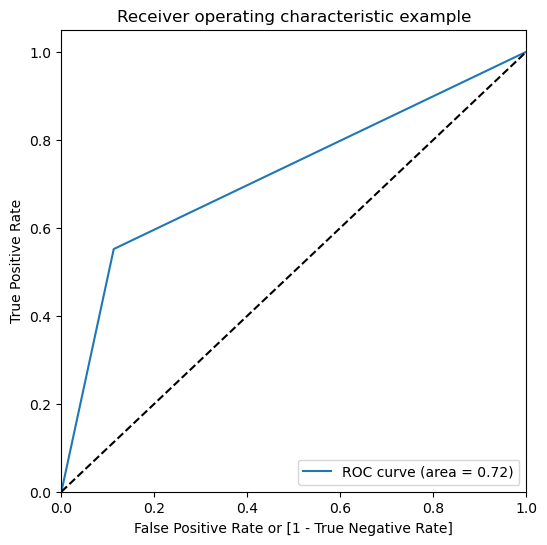

(array([0.        , 0.11256545, 1.        ]),
 array([0.        , 0.55154639, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [48]:
# Define the ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

draw_roc(y_pred_final.Churn, y_pred_final.predicted)


In [49]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))


'0.83'

In [50]:
# Checking the shape of the dataset
X_train.shape

(4922, 30)

# Step6: Model Building Using PCA

In [51]:
# Importing libraries for PCA
from sklearn.decomposition import PCA
# Using the PCA on the dataset
pca = PCA(random_state=100)
pca.fit(X_train)

PCA(random_state=100)

In [52]:
# Components from the PCA
pca.components_

array([[ 8.94359505e-03,  1.41733994e-05,  3.27790479e-05,
         8.64989605e-03,  9.99922535e-01,  1.72744201e-05,
         7.26226854e-05,  1.47931123e-05,  2.89459843e-05,
         6.90840569e-05,  3.35693902e-05, -1.12117676e-05,
        -5.56537042e-05,  1.70569499e-06, -9.00507968e-05,
         1.04224196e-04,  7.92039973e-05, -6.92113554e-05,
        -1.49447952e-05,  8.41561505e-05, -3.79575901e-05,
         1.07168945e-04, -3.80168418e-05,  1.07228197e-04,
        -1.69221855e-05,  8.61335408e-05, -4.05058557e-05,
         1.09717211e-04, -4.12395578e-05,  1.10450913e-04],
       [-4.39055451e-01,  2.65222861e-03,  6.43648393e-03,
         8.97857036e-01, -3.84307062e-03,  2.99593397e-03,
        -3.53000597e-03, -3.97734238e-03, -2.37254213e-03,
        -7.59516135e-03, -2.27042482e-03,  7.57770483e-03,
        -3.31091583e-03, -4.07966186e-04, -1.74765551e-03,
         4.39988412e-03,  1.42410513e-02, -1.11267663e-02,
         1.06396964e-02,  4.87069848e-04,  8.38533946e-

In [53]:
pca.explained_variance_ratio_

array([9.99861304e-01, 1.21286462e-04, 1.65332951e-05, 1.19416914e-07,
       8.74188907e-08, 6.41501350e-08, 6.34824109e-08, 5.56786347e-08,
       5.51559700e-08, 5.37159115e-08, 4.92040197e-08, 4.71994708e-08,
       4.31687937e-08, 4.21761611e-08, 4.02847542e-08, 3.90906923e-08,
       3.57681174e-08, 2.62940649e-08, 1.93456633e-08, 1.44902315e-08,
       1.02961914e-08, 9.67584834e-09, 1.22945214e-10, 6.84059958e-33,
       6.84059958e-33, 6.84059958e-33, 6.84059958e-33, 6.84059958e-33,
       6.84059958e-33, 6.84059955e-33])

In [54]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

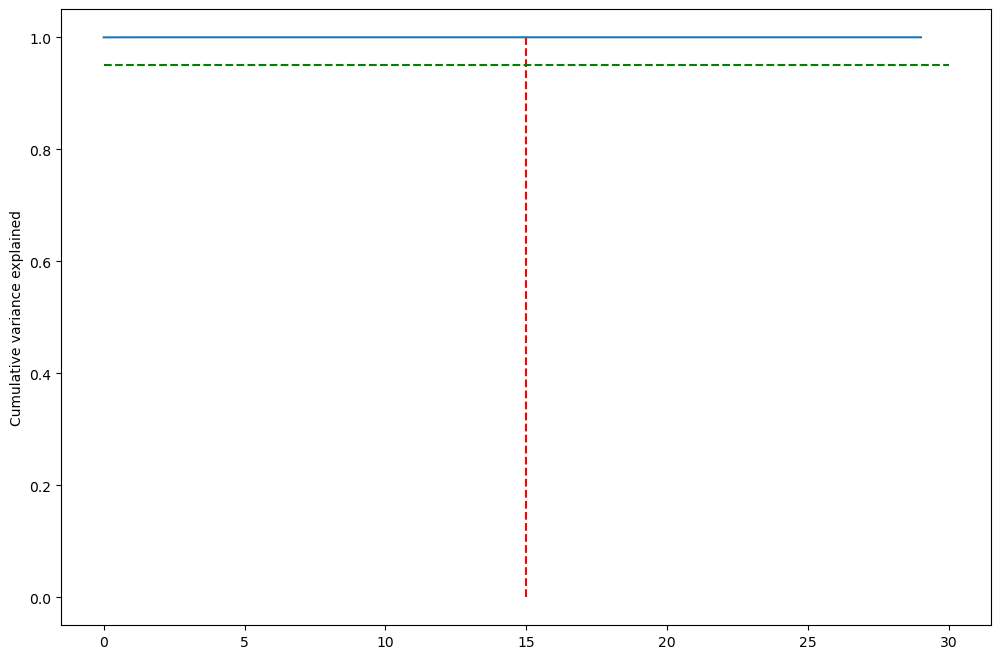

In [55]:
# Plotting the Scree plot 
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [56]:
# Using n_components = 15 according the Scree plot
from sklearn.decomposition import IncrementalPCA
# Develop the Final PCA 
pca_final = IncrementalPCA(n_components=15)

df_train_pca = pca_final.fit_transform(X_train)

df_train_pca.shape



(4922, 15)

In [57]:
# Develop correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())

corrmat.shape



(15, 15)

<AxesSubplot:>

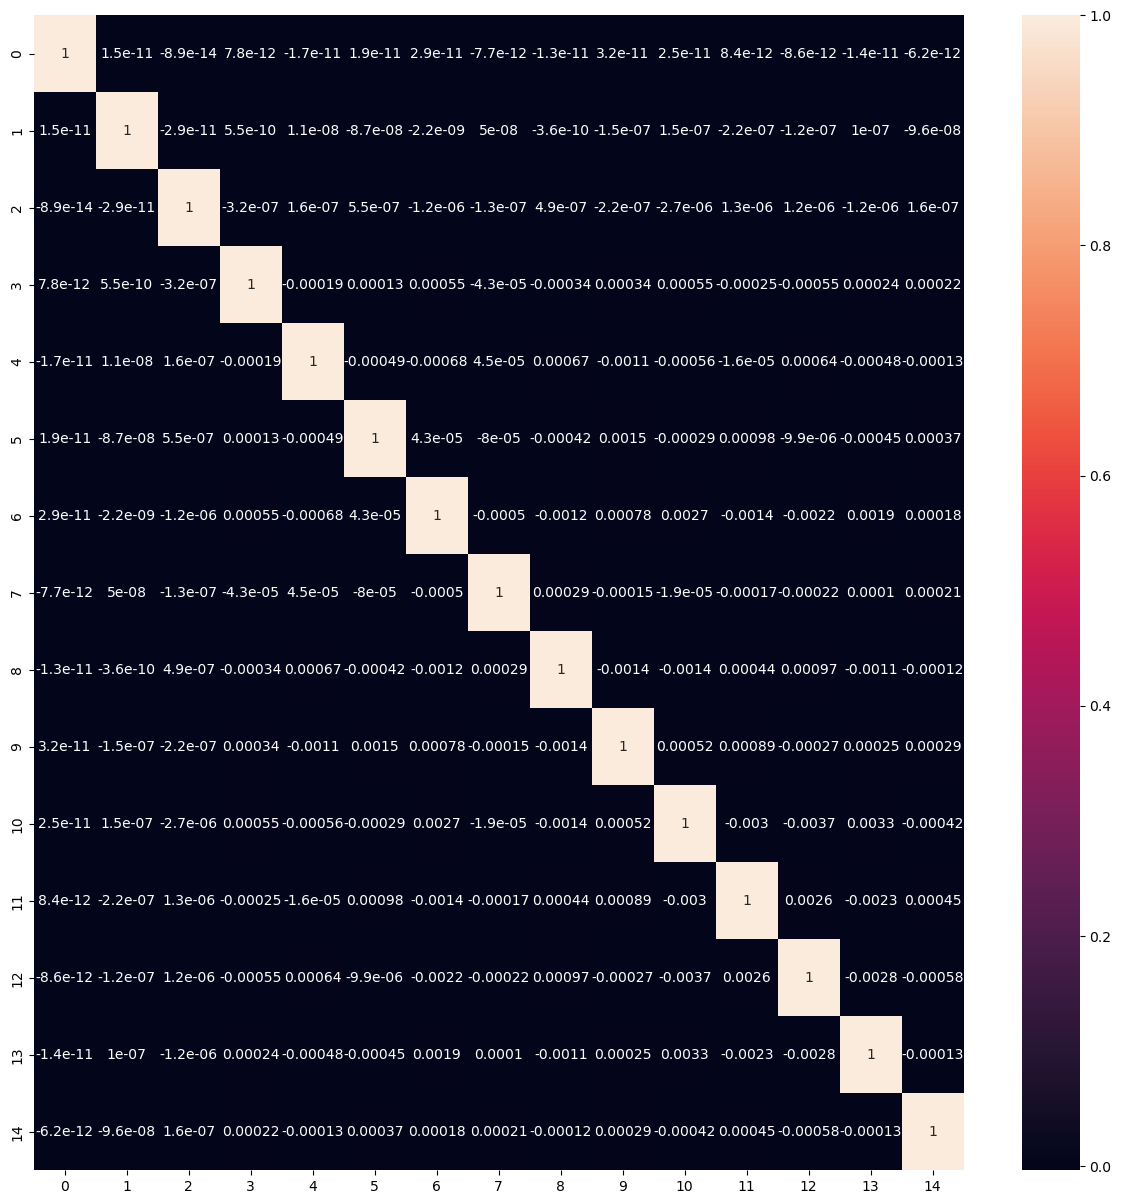

In [58]:
# Printing the heat map
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)


# Step7: Evaluation of the model using Test dataset

In [59]:
# Applying the PCA on test dataset
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape


(2110, 15)

In [60]:
# Applying logistic regression on the data o PCA based dataset

from sklearn.linear_model import LogisticRegression

learner_pca = LogisticRegression()

model_pca = learner_pca.fit(df_train_pca, y_train)


In [61]:
# Checking the predict probability on PCA based test data
pred_probs_test = model_pca.predict_proba(df_test_pca)


In [62]:
# Checking the Area under the ROC 
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

After successful completion of the case study using PCA based dataset and Logistic Regression model, it can be concluded that the model perform really well with only 15 composited feature variables.
It gives 0.83 as AUC score from ROC which is very good result.